In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

In [486]:
X_train_1 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\train-set\\train_data_1.pkl'))
X_train_6 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\train-set\\train_data_6.pkl'))
X_train_7 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\train-set\\train_data_7.pkl'))
X_train_8 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\train-set\\train_data_8.pkl'))
X_train_10 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\train-set\\train_data_10.pkl'))
X_train_11 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\train-set\\train_data_11.pkl'))

In [487]:
X_train = pd.concat([X_train_1, X_train_6, X_train_7, X_train_8, X_train_10, X_train_11], axis=1)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,4503.0,4503.000000,4503.0,4503.0,4503.000000,4503.000000,4503.000000,4503.00000,4503.000000,4503.000000,...,4503.0,4503.0,4503.0,4503.0,4503.0,4503.0,4503.0,4503.0,4503.0,4503.0
unique,4044.0,4359.000000,85.0,729.0,4359.000000,4359.000000,406.000000,715.00000,4359.000000,4359.000000,...,1.0,1.0,767.0,1.0,1.0,731.0,1.0,729.0,730.0,1.0
top,403.0,251.195767,1.0,0.0,99.237556,16.524067,297.029703,67.72009,-0.125557,-0.105975,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
freq,5.0,3.000000,877.0,369.0,3.000000,3.000000,2419.000000,31.00000,3.000000,3.000000,...,4503.0,4503.0,482.0,4503.0,4503.0,522.0,4503.0,590.0,569.0,4503.0


In [488]:
X_train.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', length=600)

In [489]:
y_train = pd.DataFrame(pd.read_csv('..\\..\\data\\processed\\train-set\\new_train_labels.csv'))['First_label']
y_train.describe()

count    4503.000000
mean        2.464579
std         1.738841
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: First_label, dtype: float64

In [490]:
X_test_1 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\test-set\\test_data_1.pkl'))
X_test_6 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\test-set\\test_data_6.pkl'))
X_test_7 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\test-set\\test_data_7.pkl'))
X_test_8 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\test-set\\test_data_8.pkl'))
X_test_10 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\test-set\\test_data_10.pkl'))
X_test_11 = pd.DataFrame(pd.read_pickle('..\\..\\data\\processed\\test-set\\test_data_11.pkl'))

In [491]:
X_test = pd.concat([X_test_1, X_test_6, X_test_7, X_test_8, X_test_10, X_test_11], axis=1)
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,1112.000000,1112.000000,1112.0,1112.0,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,1112.000000,...,1112.0,1112.0,1112.0,1112.0,1112.0,1112.0,1112.0,1112.0,1112.0,1112.0
unique,1078.000000,1100.000000,60.0,336.0,1100.000000,1100.000000,278.000000,427.000000,1100.000000,1100.000000,...,1.0,1.0,365.0,1.0,1.0,364.0,1.0,339.0,326.0,1.0
top,320.571429,173.976218,1.0,0.0,243.961172,44.417776,297.029703,76.142132,0.031797,-0.115539,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
freq,3.000000,2.000000,218.0,79.0,2.000000,2.000000,574.000000,13.000000,2.000000,2.000000,...,1112.0,1112.0,123.0,1112.0,1112.0,141.0,1112.0,142.0,149.0,1112.0


In [492]:
y_test = pd.DataFrame(pd.read_csv('..\\..\\data\\processed\\test-set\\new_test_labels.csv'))['First_label']
y_test.describe()

count    1112.000000
mean        2.468525
std         1.721600
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: First_label, dtype: float64

In [493]:
import pickle

with open('..\\..\\data\\processed\\train-set\\train_features.pickle', 'wb') as handle:
    pickle.dump(X_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('..\\..\\data\\processed\\test-set\\test_features.pickle', 'wb') as handle:
    pickle.dump(X_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [494]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.48      0.47      0.47       178
         1.0       0.40      0.43      0.42       129
         2.0       0.80      0.75      0.78       360
         3.0       0.32      0.37      0.34       124
         4.0       0.42      0.42      0.42       125
         5.0       0.48      0.48      0.48       152
         6.0       0.31      0.25      0.28        44

    accuracy                           0.53      1112
   macro avg       0.46      0.45      0.46      1112
weighted avg       0.54      0.53      0.54      1112



In [495]:
print(confusion_matrix(y_test,predictions))

[[ 84  25  14  18   7  24   6]
 [ 19  56  11  15  12  12   4]
 [ 18  18 271  22  18   7   6]
 [ 10   9  14  46  21  18   6]
 [ 10  14   9  26  53  13   0]
 [ 22  16  12  12  14  73   3]
 [ 13   2   8   4   2   4  11]]


In [496]:
train_score = dtree.score(X_train, y_train)
train_score

0.987119697979125

In [497]:
test_score = dtree.score(X_test, y_test)
test_score

0.5341726618705036

In [498]:
from sklearn.preprocessing import StandardScaler

In [499]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

In [500]:
scaler1.fit(X_train)
scaler2.fit(X_test)

StandardScaler()

In [501]:
train_scaled_features = scaler1.transform(X_train)
test_scaled_features = scaler2.transform(X_test)

In [502]:
X_train = pd.DataFrame(train_scaled_features)
X_test = pd.DataFrame(test_scaled_features)

In [503]:
#df_feat.dropna(inplace=True, axis=1)
#df_feat.describe()

# KNN

In [509]:
from sklearn.neighbors import KNeighborsClassifier

In [510]:
knn = KNeighborsClassifier(n_neighbors=1)

In [511]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [512]:
pred = knn.predict(X_test)

In [513]:
from sklearn.metrics import classification_report,confusion_matrix

In [514]:
print(confusion_matrix(y_test,pred))

[[106  20  11  17  12  11   1]
 [ 13  84   8  10   6   8   0]
 [ 32  17 252  20  17  15   7]
 [ 21  11  16  38  18  17   3]
 [ 16  10  12  19  53  13   2]
 [ 31  10   6  15  14  76   0]
 [ 14   6   4   7   2   1  10]]


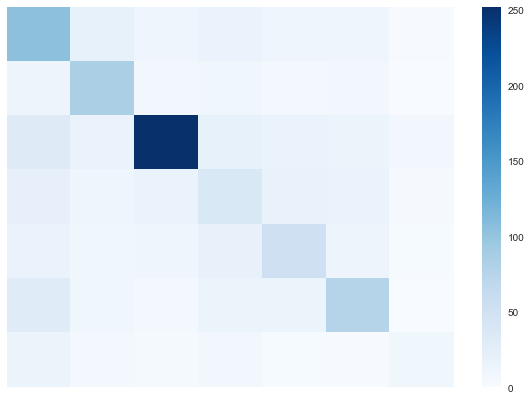

In [515]:
df_cm = pd.DataFrame(confusion_matrix(y_test,pred))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, cmap='Blues', xticklabels=False, yticklabels=False)

In [507]:
train_score = knn.score(X_train, y_train)
train_score

0.987119697979125

In [516]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.45      0.60      0.52       178
         1.0       0.53      0.65      0.59       129
         2.0       0.82      0.70      0.75       360
         3.0       0.30      0.31      0.30       124
         4.0       0.43      0.42      0.43       125
         5.0       0.54      0.50      0.52       152
         6.0       0.43      0.23      0.30        44

    accuracy                           0.56      1112
   macro avg       0.50      0.49      0.49      1112
weighted avg       0.57      0.56      0.56      1112



In [434]:
#Choosing K-value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

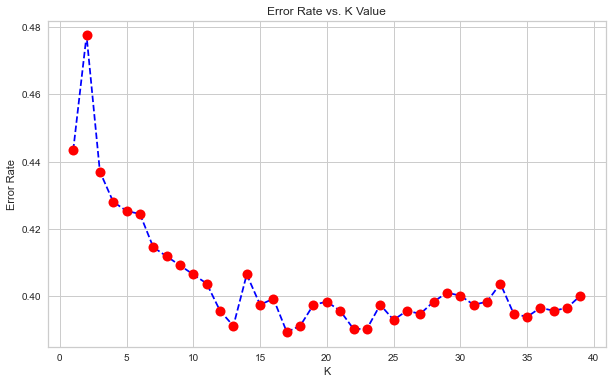

In [354]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [517]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[106  20  11  17  12  11   1]
 [ 13  84   8  10   6   8   0]
 [ 32  17 252  20  17  15   7]
 [ 21  11  16  38  18  17   3]
 [ 16  10  12  19  53  13   2]
 [ 31  10   6  15  14  76   0]
 [ 14   6   4   7   2   1  10]]


              precision    recall  f1-score   support

         0.0       0.45      0.60      0.52       178
         1.0       0.53      0.65      0.59       129
         2.0       0.82      0.70      0.75       360
         3.0       0.30      0.31      0.30       124
         4.0       0.43      0.42      0.43       125
         5.0       0.54      0.50      0.52       152
         6.0       0.43      0.23      0.30        44

    accuracy                           0.56      1112
   macro avg       0.50      0.49      0.49      1112
weighted avg       0.57      0.56      0.56      1112



In [518]:
train_score = knn.score(X_train, y_train)
train_score

0.987119697979125

In [519]:
test_score = knn.score(X_test, y_test)
test_score

0.5566546762589928

In [520]:
# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[142  12   9   4   2   8   1]
 [ 15  92   8   4   7   3   0]
 [ 44  22 270  12   3   9   0]
 [ 40  11  17  34   6  16   0]
 [ 22  15  12  23  46   7   0]
 [ 31  14   5   3   7  92   0]
 [ 23   8   7   2   2   1   1]]


              precision    recall  f1-score   support

         0.0       0.45      0.80      0.57       178
         1.0       0.53      0.71      0.61       129
         2.0       0.82      0.75      0.78       360
         3.0       0.41      0.27      0.33       124
         4.0       0.63      0.37      0.46       125
         5.0       0.68      0.61      0.64       152
         6.0       0.50      0.02      0.04        44

    accuracy                           0.61      1112
   macro avg       0.57      0.50      0.49      1112
weighted avg       0.63      0.61      0.59      1112



In [521]:
train_score = knn.score(X_train, y_train)
train_score

0.677770375305352

In [523]:
test_score = knn.score(X_test, y_test)
test_score

0.6088129496402878

# DecisionTree Classifier

In [444]:
from sklearn.tree import DecisionTreeClassifier

In [445]:
dtree = DecisionTreeClassifier()

In [446]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [447]:
predictions = dtree.predict(X_test)

In [448]:
from sklearn.metrics import classification_report,confusion_matrix

In [449]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.48      0.50      0.49       178
         1.0       0.41      0.50      0.45       129
         2.0       0.81      0.76      0.78       360
         3.0       0.35      0.37      0.36       124
         4.0       0.42      0.47      0.45       125
         5.0       0.49      0.45      0.47       152
         6.0       0.20      0.11      0.14        44

    accuracy                           0.54      1112
   macro avg       0.45      0.45      0.45      1112
weighted avg       0.55      0.54      0.54      1112



In [450]:
print(confusion_matrix(y_test,predictions))

[[ 89  24  12  17  13  16   7]
 [ 18  64  10  11  16   9   1]
 [ 17  23 272  20  13  11   4]
 [  9  16  12  46  22  15   4]
 [  6   8  11  24  59  16   1]
 [ 32  16   9  12  12  68   3]
 [ 16   4   8   1   5   5   5]]


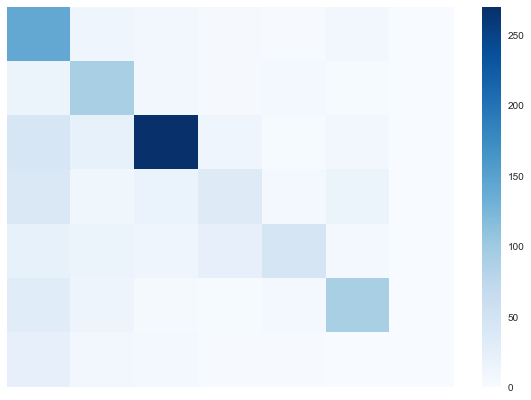

In [451]:
df_cm = pd.DataFrame(confusion_matrix(y_test,pred))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, cmap='Blues', xticklabels=False, yticklabels=False)

In [452]:
train_score = dtree.score(X_train, y_train)
train_score

0.987119697979125

In [453]:
test_score = dtree.score(X_test, y_test)
test_score

0.5422661870503597

In [454]:
#train_predict = rfc.predict(X_train)
#test_predict = rfc.predict(X_test)
#train_mse = mean_squared_error(y_train, train_predict)
#test_mse = mean_squared_error(y_test, test_predict)

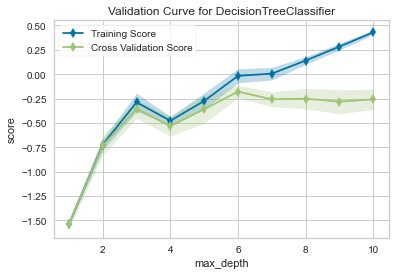

In [371]:
#Hyperparameter tuning: choosing depth
from yellowbrick.model_selection import ValidationCurve
from warnings import simplefilter
# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
X = pd.concat([X_train, X_test])
y = pd.concat([y_train,y_test])
# Plot the validation curve
#print(validation_curve(dtree, X, y, 
 #                      param_name="max_depth", n_jobs=-1,
  #                     param_range=np.arange(1, 11), 
   #                    cv=10, scoring="accuracy"))


viz = ValidationCurve(
    DecisionTreeClassifier(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [398]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)

In [399]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [400]:
predictions = dtree.predict(X_test)

In [401]:
from sklearn.metrics import classification_report,confusion_matrix

In [402]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.29      0.70      0.41       178
         1.0       0.34      0.50      0.41       129
         2.0       0.87      0.77      0.82       360
         3.0       0.00      0.00      0.00       124
         4.0       0.54      0.24      0.33       125
         5.0       0.47      0.37      0.41       152
         6.0       0.00      0.00      0.00        44

    accuracy                           0.50      1112
   macro avg       0.36      0.37      0.34      1112
weighted avg       0.49      0.50      0.47      1112



C:\Users\11068\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [403]:
print(confusion_matrix(y_test,predictions))

[[125  40   5   0   1   7   0]
 [ 35  65   6   0   4  19   0]
 [ 49  24 278   0   6   3   0]
 [ 69  21  10   0  10  14   0]
 [ 48  17  10   0  30  20   0]
 [ 81   8   5   0   2  56   0]
 [ 19  16   5   0   3   1   0]]


In [404]:
train_score = dtree.score(X_train, y_train)
train_score

0.5602931379080613

In [405]:
test_score = dtree.score(X_test, y_test)
test_score

0.4982014388489209

In [380]:
from sklearn.metrics import accuracy_score

Optimal hyperparameter combination: {'max_depth': 12, 'min_samples_leaf': 30, 'min_samples_split': 2}

Mean cross-validated training accuracy score: 0.5847165420065918
Test accuracy: 0.58


Text(34.0, 0.5, 'True')

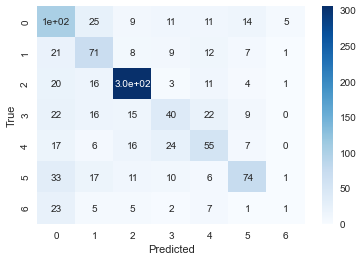

In [381]:
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dtree, param_grid=hyperparameter_space, 
                  scoring="accuracy",
                  n_jobs=-1, cv=2, return_train_score=True)

gs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      gs.best_score_)
gs.best_estimator_.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [382]:
dtree = DecisionTreeClassifier(max_depth=12, min_samples_leaf=30, min_samples_split=2, random_state=42)

In [383]:
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.43      0.58      0.49       178
         1.0       0.46      0.55      0.50       129
         2.0       0.83      0.85      0.84       360
         3.0       0.40      0.32      0.36       124
         4.0       0.44      0.44      0.44       125
         5.0       0.64      0.49      0.55       152
         6.0       0.11      0.02      0.04        44

    accuracy                           0.58      1112
   macro avg       0.47      0.46      0.46      1112
weighted avg       0.58      0.58      0.57      1112



In [384]:
train_score = dtree.score(X_train, y_train)
train_score

0.6819897845880524

In [385]:
test_score = dtree.score(X_test, y_test)
test_score

0.5836330935251799

# Random Forests

In [524]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [525]:
rfc_pred = rfc.predict(X_test)

In [526]:
train_score = rfc.score(X_train, y_train)
train_score

0.987119697979125

In [527]:
test_score = rfc.score(X_test, y_test)
test_score

0.6969424460431655

In [459]:
#train_predict = rfc.predict(X_train)
#test_predict = rfc.predict(X_test)
#train_mse = mean_squared_error(y_train, train_predict)
#test_mse = mean_squared_error(y_test, test_predict)

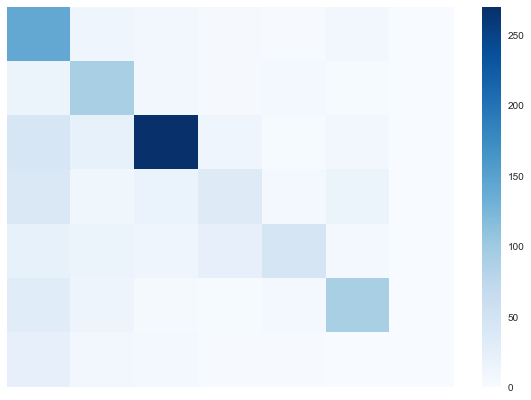

In [460]:
df_cm = pd.DataFrame(confusion_matrix(y_test,pred))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, cmap='Blues', xticklabels=False, yticklabels=False)

In [528]:
print(confusion_matrix(y_test,rfc_pred))

[[136  14   9   3   3  12   1]
 [ 12  85  17   3   7   5   0]
 [ 15   5 332   3   3   2   0]
 [ 25   0  18  59  14   7   1]
 [ 13   7  15  17  66   7   0]
 [ 28   8   8   7   6  95   0]
 [ 22   7   7   2   2   2   2]]


In [529]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.54      0.76      0.63       178
         1.0       0.67      0.66      0.67       129
         2.0       0.82      0.92      0.87       360
         3.0       0.63      0.48      0.54       124
         4.0       0.65      0.53      0.58       125
         5.0       0.73      0.62      0.67       152
         6.0       0.50      0.05      0.08        44

    accuracy                           0.70      1112
   macro avg       0.65      0.57      0.58      1112
weighted avg       0.69      0.70      0.68      1112



In [463]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rfc, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [464]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = [10, 25], cv = 3)

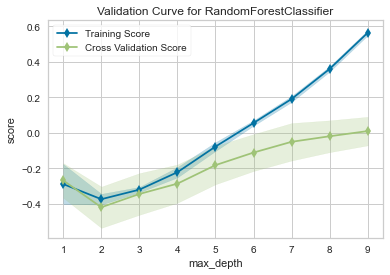

In [465]:
from yellowbrick.model_selection import ValidationCurve
from warnings import simplefilter
# Ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
X = pd.concat([X_train, X_test])
y = pd.concat([y_train,y_test])
# Plot the validation curve

viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(1, 10), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [530]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_leaf=1, min_samples_split=2)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [531]:
train_score = rfc.score(X_train, y_train)
train_score

0.6828780812791473

In [532]:
test_score = rfc.score(X_test, y_test)
test_score

0.6312949640287769

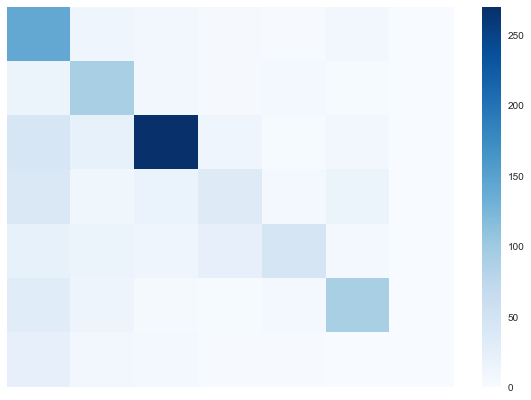

In [533]:
df_cm = pd.DataFrame(confusion_matrix(y_test,pred))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, cmap='Blues', xticklabels=False, yticklabels=False)

In [534]:
print(confusion_matrix(y_test,rfc_pred))

[[147   6  15   0   0  10   0]
 [ 28  59  19   1  10  12   0]
 [ 16   1 341   1   0   1   0]
 [ 55   3  21  10  21  14   0]
 [ 25   3  27   1  59  10   0]
 [ 41   1  12   2  10  86   0]
 [ 25   5   8   0   4   2   0]]


In [535]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.44      0.83      0.57       178
         1.0       0.76      0.46      0.57       129
         2.0       0.77      0.95      0.85       360
         3.0       0.67      0.08      0.14       124
         4.0       0.57      0.47      0.52       125
         5.0       0.64      0.57      0.60       152
         6.0       0.00      0.00      0.00        44

    accuracy                           0.63      1112
   macro avg       0.55      0.48      0.46      1112
weighted avg       0.63      0.63      0.59      1112



C:\Users\11068\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting Classifiers

In [536]:
from sklearn.ensemble import GradientBoostingClassifier

In [537]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.075, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Learning rate:  1
Accuracy score (training): 0.147
Accuracy score (test): 0.143
Confusion Matrix:
[[127  14  21   3   2  10   1]
 [  8  88  18   3   6   5   1]
 [ 22   6 318   9   1   4   0]
 [ 31   7  26  41   9  10   0]
 [ 14   7  27   8  59   9   1]
 [ 24   8  20   5   6  89   0]
 [ 13   8  11   4   1   3   4]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.53      0.71      0.61       178
         1.0       0.64      0.68      0.66       129
         2.0       0.72      0.88      0.79       360
         3.0       0.56      0.33      0.42       124
         4.0       0.70      0.47      0.56       125
         5.0       0.68      0.59      0.63       152
         6.0       0.57      0.09      0.16        44

    accuracy                           0.65      1112
   macro avg       0.63      0.54      0.55      1112
weighted avg       0.65      0.65      0.63      1112



In [538]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=10, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.987
Accuracy score (test): 0.688
Learning rate:  0.075
Accuracy score (training): 0.987
Accuracy score (test): 0.689
Learning rate:  0.1
Accuracy score (training): 0.987
Accuracy score (test): 0.685
Learning rate:  0.25
Accuracy score (training): 0.987
Accuracy score (test): 0.674
Learning rate:  0.5
Accuracy score (training): 0.987
Accuracy score (test): 0.683
Learning rate:  0.75
Accuracy score (training): 0.987
Accuracy score (test): 0.674
Learning rate:  1
Accuracy score (training): 0.288
Accuracy score (test): 0.270


In [539]:
gb_clf2 = GradientBoostingClassifier(n_estimators=30, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[123  14  16  10   5   8   2]
 [ 15  76  12   7  11   6   2]
 [ 35  15 279   9   8  10   4]
 [ 24   6  27  35  19  12   1]
 [ 10   9  18   8  69   9   2]
 [ 31   7  13   6  11  83   1]
 [ 12   8  12   2   1   4   5]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.49      0.69      0.57       178
         1.0       0.56      0.59      0.58       129
         2.0       0.74      0.78      0.76       360
         3.0       0.45      0.28      0.35       124
         4.0       0.56      0.55      0.55       125
         5.0       0.63      0.55      0.58       152
         6.0       0.29      0.11      0.16        44

    accuracy                           0.60      1112
   macro avg       0.53      0.51      0.51      1112
weighted avg       0.59      0.60      0.59      1112



In [540]:
train_score = gb_clf2.score(X_train, y_train)
train_score

0.7301798800799467

In [541]:
test_score = gb_clf2.score(X_test, y_test)
test_score

0.6025179856115108